In [2]:
from matplotlib import image, rcParams
import matplotlib.pyplot as plt
import numpy as np
# rcParams['figure.dpi'] = 150

In [17]:
# Resample at LCM of grid, this can allow for higher dithering if needed

def resample(dim, image):
    x,y,_ = image.shape
    min_dim = min(x,y)
    lcm  = np.lcm(min_dim, dim)
    sizer = lcm/min_dim
    output = np.zeros((lcm, lcm, 4))
    for y, row in enumerate(image):
        rs = int(y*sizer)
        re = int(y*sizer + sizer)
        vertical_chunk = output[rs:re]
        for x, pixel in enumerate(row):
            cs = int(x*sizer)
            ce = int(x*sizer + sizer)
            for vc in vertical_chunk:
                vc[cs:ce] = pixel
            # if not np.array_equal(pixel, white_pixel) : print('gotem')
    return output, lcm



In [42]:
def draw_sample_grid(dim, image):
    resampled, sample_rate = resample(dim,image)
    print(f"resampled at {sample_rate} pixels")
    fig,ax = plt.subplots(figsize=(6,6))
    ax.imshow(resampled)
    grid = np.arange(0, len(resampled), sample_rate/dim)
    grid_labels = np.arange(0, dim)
    plt.xticks(grid)
    plt.yticks(grid)
    ax.grid(color='grey', linestyle='-', linewidth=0.1)
    ax.set_xticklabels(grid_labels, fontdict={"size":6})
    ax.set_yticklabels(grid_labels, fontdict={"size":6})
    

resampled at 1640 pixels


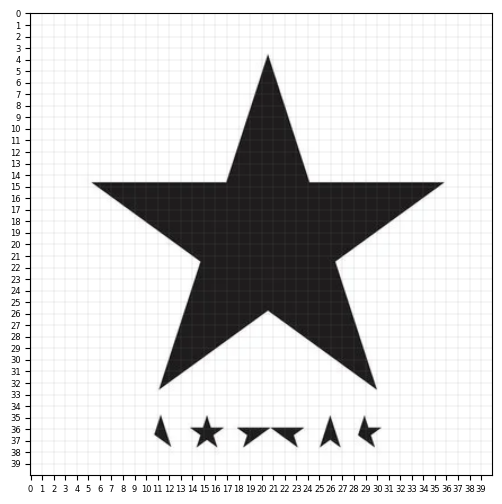

In [43]:
draw_sample_grid(40, image_ar)

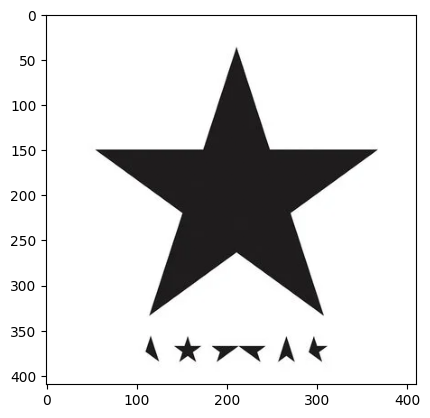

In [8]:
image_ar = image.imread('blackstar.png')
fig,ax = plt.subplots()
ax.imshow(image_ar)

In [3]:
GRID_DIM = 50

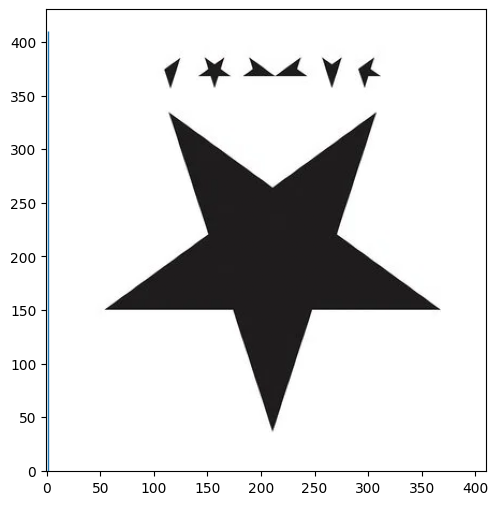

In [7]:
fig,ax = plt.subplots(figsize=(6,6))
grid = np.arange(0, GRID_DIM+1, 1.0)
# ax.set_aspect('equal', adjustable='box')
# plt.xticks(grid)
# plt.yticks(grid)
# ax.grid(color='grey', linestyle='-', linewidth=0.1)
# ax.axis('off')
# ax.set_xticklabels([])
# ax.set_yticklabels([])
ax.imshow(image_ar, origin='lower')
# ax.plot(x, y, linewidth=0.2, c='b')
ax.vlines(1, 0, image_ar.shape[0], linewidth=1)
# plt.tight_layout()
plt.show()

In [40]:
image_ar.shape

(410, 410, 4)